# TP Analyse de Fourier et Hilbertienne n° 2

**ENS Cachan**

**Département de Mathématiques**

**2019 / 2020**


---


**NOM et Prenom:**    LIANG Wendong

---


## Consignes pour le rapport de TP

Ce TP comporte 12 questions. Les réponses, les résultats d'expérience (images, figures), ansi que les codes devront être rassemblés dans un notebook **individuel**. 

Vous êtes également invité à rajouter toute remarque ou commentaire sur les résultats ou votre code là où vous le jugerez nécessaire. Vous pouvez créer une nouvelle cellule en cliquant sur l'icone <font size="4">+</font> and choisir le type de cellule (*Code* ou "*Markdown*"/*Texte* pour du texte). **Pensez à sauvegarder régulièrement votre travail** (icône disquette sur *Jupyter* ou CTRL+S).

Ce rapport est à envoyer via le site suivant : [lien](https://docs.google.com/forms/d/1kidyeKvme_KBmH7JLkp-9rmCauu1m1dq2KgnH2dotxA/viewform?edit_requested=true) au plus tard pour le **vendredi 08 novembre 2019 - 23h59**. \
 <font size="4"> <b>Une pénalité de <font color=red>deux points par jour</font> de retard sera appliquée </b></font> \
Le fichier joint doit être un notebook exécutable au format *ipynb* (dans *Google Colab*, Fichiers -> Télécharger le fichier ipynb), intitulé *nom_prenom_tp2.ipynb*.
Vous recevrez un accusé de soumission. Veuillez vous en assurez.

Enfin nous vous recommandons avant d'envoyer votre TP de cliquer sur Execution -> Redémarrer et tout executer. Vérifier ensuite que l'ensemble du notebook ne comporte pas d'erreurs.

## Rapide tutoriel de notebook

Le format du TP est un notebook Python (fichier *ipynb*). C'est une interface de programmation *intéractive* qui vous permettra d'executer des cellules de codes pythons et d'écrire directement vous solutions remarques et commentaires. Ce notebook est composé de plusieurs cellules. Une cellule peut être soit une cellule de code dans laquelle vous rédigez du code python, soit une cellule de texte où vous rédiger comme dans un traitement de texte classique.

Chaque cellule de code python peut s'executer *indépendamment* des autres. Le résultat de chaque cellule (affichage d'une image, résultat d'un ``print``, ou même une erreur de compilation) s'affiche en dessous de chaque cellule exécutée, exactement comme dans le shell python de logiciel comme *PyCharm, Pyzo* ou *Spyder* ou n'importe quel autre de vos environnements Python préférés.

Pour modifier une cellule (de code ou de texte) il suffit de double cliquer dessus. \
Après modification d'une cellule de texte ou pour executer une cellule de code, il faut appuyer sur CTRL+entrée. Pour gagner du temps, vous pouvez aussi appuyer sur SHIFT+Entrée pour executer une cellule et passer à la cellule suivante.

Pour la rédaction de vos réponses, remarques, etc. vous pouvez :
 - taper du texte classique
 - mettre en caractère italique en encadrant votre texte entre deux astérisques ( * blabla * )  *comme ceci*
 - mettre en caractère gras en encadrant votre texte entre deux doubles astériques ( ** blablabla ** ) **comme ceci**
 - écrire en langage mathématique avec $\LaTeX$ entre mettant l'expression entre deux dollars au sein d'une ligne ou entre deux double dollars pour écrire une équation sur une seule ligne
 
Vous pouvez trouver plus d'information à propos des notebooks sur internet et en particulier sur [lien](https://python.sdv.univ-paris-diderot.fr/18_jupyter/) qui traite de l'installation à l'utilisation d'un notebook *Jupyter*.

Vous pouvez trouver quelques informations sur les principaux boutons que l'on va utiliser pour ces TP sur les figures suivantes. La première figure illustre l'environnement de *Jupyter notebook*, la seconde l'environnement de *Google Colaboratory*.

![img](https://mnhrdt.github.io/afh/TP2/figure0.jpeg)
![img](https://mnhrdt.github.io/afh/TP2/figure0_colab.jpeg)


# Mise en route

## Modules python et fichiers necessaires

On commence par charger les images ainsi que les modules python nécessaires pour l'execution du TP.


In [6]:
!wget -qN https://mnhrdt.github.io/afh/TP2/images-tp2.zip
!unzip -o images-tp2.zip

Archive:  images-tp2.zip
  inflating: baboon.png              
  inflating: barbara.png             
  inflating: building.png            
  inflating: butte.png               
  inflating: hat.png                 
  inflating: lena.png                
  inflating: nouvelle_image.png      
  inflating: piece_regular.txt       
  inflating: room.png                
  inflating: sand.png                
  inflating: tile.png                
  inflating: water.png               


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import skimage
import skimage.io as imageio

from numpy.fft import fft, ifft, fftshift, ifftshift, fft2, ifft2
from scipy.fftpack import dct, idct

plt.show()
plt.ion()

%matplotlib inline

# 1. Notions de base

## 1.1 Visualisation des signaux

Les signaux sont des vecteurs 1D, le plus souvent stockés sous forme de tableaux de dimensions $(n, 1)$ où $n$ est le nombre d’échantillons. On utilisera la fonction `loadtxt` pour charger le signal suivant qui se trouve dans votre répertoire courant.

In [0]:
s = np.loadtxt("piece_regular.txt")

Pour le visualiser, on utilise la fonction `plot` :

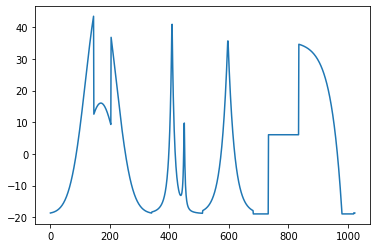

In [9]:
plt.figure()
plt.clf()
plt.plot(s)

## 1.2 Visualisation d'images

On travaillera avec des images en échelle de gris. Comme pour le TP1, 
* pour lire une image `u`, on utilise la fonction `imageio.imread`
* pour la visualiser (ou n'importe quel autre tableau), nous utiliserons la fonction `plt.imshow`

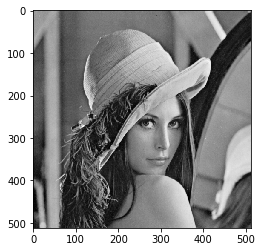

In [10]:
u = imageio.imread("lena.png")

plt.figure()
plt.clf()
plt.imshow(u, cmap=plt.cm.gray)

**Remarque :** Pour fixer la palette grise par défaut, exécuter la cellule suivante :

In [0]:
plt.rcParams["image.cmap"]="gray"

## 1.3 Signal to Noise Ration (SNR)

Nous utiliserons la mesure SNR pour évaluer la qualité d’une approximation. Pour une image $u_M$ approximant l’image $u$, la mesure SNR est définie par 
$$ SNR(u, u_M) = -20 \log_{10} \left( \dfrac{\Vert u - u_M \Vert_2}{\Vert u \Vert_2}  \right), $$
qui est une quantité exprimée en décibels (dB). Le SNR est une fonction croissante de la qualité de l'approximation.

la cellule suivante définie une fonction `snr`. Pour obtenir une valeur du SNR entre deux images, vous n'aurez plus qu'à l'appeler `v = snr(u_modifiee, u_originale)`

In [0]:
def snr(u,u0):
    """ snr - calcule le signal-to-noise ratio
        v = snr( u, u0 )
        u est l'image modifiée (si image, elle doit être entre 0 et 1)
        u0 est l'image originale de reference (pareil, image entre 0 et 1)
    """    
    v  = u  / 255.
    v0 = u0 / 255.
    return -10 * np.log10( np.mean((v-v0)**2) / np.mean(v0**2) )

# 2. Approximation des signaux et images - bases hilbertiennes

Soit $\mathcal{B} = \{e_m\}_m$ une base orthonormée d’un espace de Hilbert $\mathcal{H}$. Tout $u \in \mathcal{H}$ peut se décomposer sur cette base

$$u = \sum_m \langle u, e_m \rangle e_m.$$

Si  au  lieu  de  représenter $u$ par  tous  les  produits  scalaires $\{\langle u, e_m \rangle \}$,  on  se  limite  à  un  certain  sous-ensemble d’indices $I_M$, avec $M = \vert I_M \vert$ éléments, on obtient une approximation :

$$ u_{I_M} = \sum_{m \in I_M} \langle u, e_m \rangle e_m.$$

Cette approximation est la projection orthogonale de $u$ sur l’espace engendré par $\{e_m\}_{m \in I_M}.$


### Question 1

**Q1 :** Montrez que l'erreur d'approximation $e[I_M] = \Vert u - u_{I_M} \Vert^2$ est alors 
$$ e[I_M] = \sum_{m \notin I_M} \vert \langle u, e_m \rangle \vert^2,$$
et tends vers $0$ quand $M \to +\infty$. À noter que néanmoins, la vitesse de convergence de l'erreur varie en fonction de la base et du sous-ensemble $I_M$ choisis.

**Réponse :** 
On suppose que $I_M $ est croissante et recouvre $\mathbb{N}$.

$e[I_M] = \Vert u - u_{I_M} \Vert^2=\Vert u - \sum_{m \in I_M} \langle u, e_m \rangle e_m \Vert^2$
$=\Vert \sum_m \langle u, e_m \rangle e_m - \sum_{m \in I_M} \langle u, e_m \rangle e_m \Vert^2$
$=\sum_{m \notin I_M} \Vert\langle u, e_m \rangle e_m \Vert^2$
$  = \sum_{m \notin I_M} \vert \langle u, e_m \rangle \vert^2,$

Comme $I_M $ est croissante et recouvre $\mathbb{N}$, ceci tends vers $0$ quand $M \to +\infty$.

On va étudier dans la suite les bases orthogonales de Fourier et en cosinus (qui est au coeur de la technologie JPEG). Le lecteur intéressé pourra poursuivre l’étude avec les bases orthogonales en ondelettes
(qui sont au coeur du format de compression JPEG-2000).

## 2.1 Approximation linéaire de *Fourier*

### Question 2

On considère une base de *Fourier* et on approxime $u$ en prenant les $M$ premiers coefficients, $I_M = \{m \mid -M/2 \leq m < M/2 \}$. C'est ce qu'on appelle l'approximation linéaire. Dans ces conditions, $M$ définit l'ensemble $I_M$. On notera donc sans ambiguïté $u_M = u_{I_M} = e[I_M]$.

**Q2 :** Calculez la transformée de *Fourier* (`np.fft.fft`) pour le signal `piece_regular`. Annulez les coefficients de *Fourier* des hautes fréquences, puis reconstruisez le signal $s_M$ en ne gardant que $M$ coefficients de *Fourier*, avec $M$ en paramètre.

In [0]:
   ## CALCULER LA TRANSFORMÉE DE FOURIER ##
def approx1(M,s):
  A=fftshift(np.fft.fft(s))

 
   ## ANNULER LES HAUTES FREQUENCES ET RECONSTRUIRE AINSI UN SIGNAL NE COMPORTANT QUE M COEFFICIENTS ##
  n=A.shape[0]
  A[0:n//2-M//2]=0
  A[n//2+M//2+1:n]=0
  return A
 


**Q2 bis :** Affichez  le  signal  original,  ses  coefficients  de  *Fourier*  (module),  ainsi  que l’approximation $s_M$ et  les coefficients de Fourier réduits.

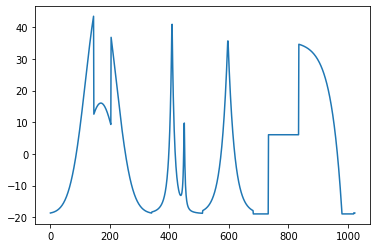

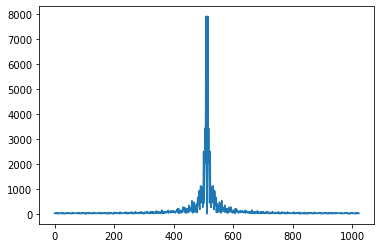

<Figure size 432x288 with 0 Axes>

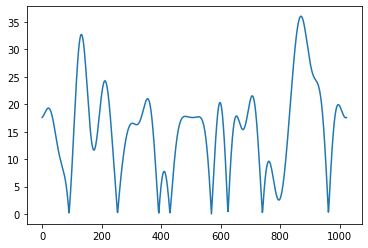

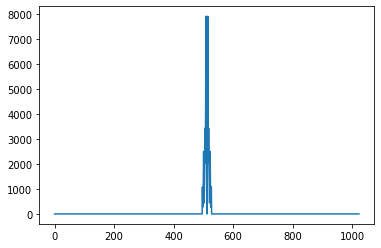

<Figure size 432x288 with 0 Axes>

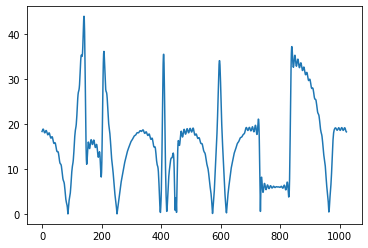

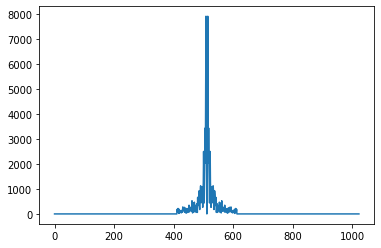

<Figure size 432x288 with 0 Axes>

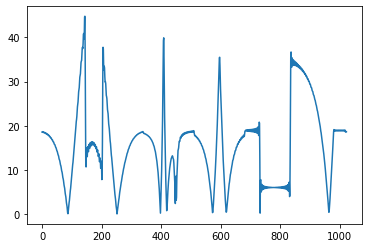

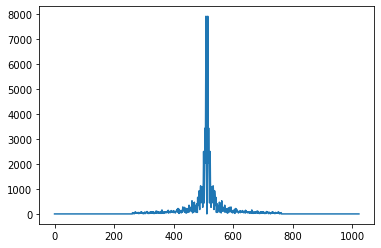

<Figure size 432x288 with 0 Axes>

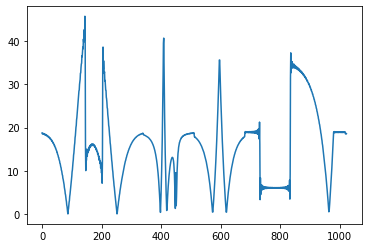

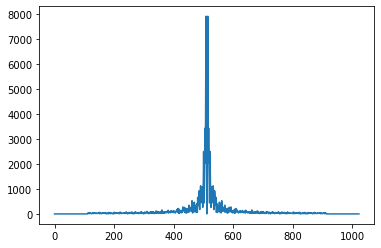

In [14]:
 # AFFICHER CE QUI EST DEMANDE ICI
  plt.plot(s)
  plt.figure()
  plt.plot(abs(fftshift(fft(s))))
  
  for M in [30,200,500,800]:
    plt.figure()
    A=approx1(M,s)
    plt.figure()
    plt.plot(abs(ifft(ifftshift(A))))
    plt.figure()
    plt.plot(abs(A))
  

**Q2 ter :** Justifiez les phénomènes observés. Faites varier $M$. Que pouvez-vous dire sur la décroissance du spectre ?

**Réponse :** il y a effet de Gibbs au point de discontinuité. Quand M décroit, l'erreur du signal augmente et le signal devient plus 'régulier'.

**Q2 quater :** Combien de coefficients faut-il garder pour avoir un SNR de $30 dB$ ?

In [15]:
     ###    ÉCRIRE VOTRE CODE ICI    ###
M=1
A=approx1(M,s)
a= snr(ifft(ifftshift(A)),s)
while a<30:
  M=M+1
  A=approx1(M,s)
  a= snr(ifft(ifftshift(A)),s)
print(M)


654


**Réponse :** 654

### Question 3

**Q3 :** Calculez la transformée de Fourier (`np.fft.fft2`) d’une image $u$ (par exemple *lena.png*) et affichez son module sur une échelle logarithmique comme dans le TP1. Annulez les coefficients de *Fourier* des hautes fréquences, puis reconstruisez l’image $u_{M^2}$ en ne gardant que $M^2$ coefficients de Fourier, avec $M^2$ en paramètre (en utilisant `real(ifft2(X)`).\
Afficher le résultat

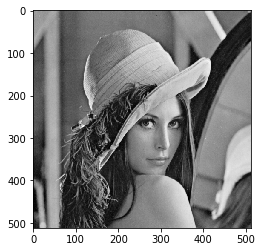

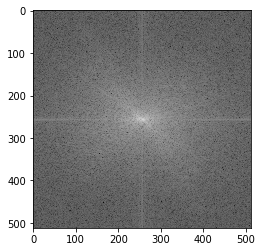

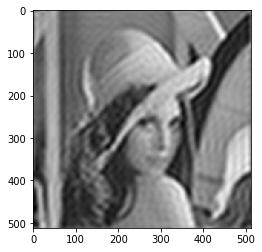

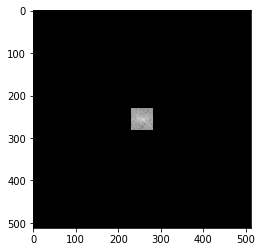

In [18]:
      ##     ECRIRE VOTRE CODE ICI    ##   
  
  

def approx2(im,M):

    modu=np.abs(fftshift(fft2(im)))

    im2=np.log((modu)+1)
    modu=fftshift(fft2(im))
    [m,n]=modu.shape

    M=int(np.sqrt(M))
    modu[0:(m-M)//2,:]=0
    modu[(m+M)//2+1:m,:]=0
    modu[:,0:(m-M)//2]=0
    modu[:,(m+M)//2+1:m]=0

    im3=np.real(ifft2(ifftshift(modu)))

    return im3,modu

M=50**2
im=imageio.imread('lena.png')
im3,modu=approx2(im,M)
plt.figure()
plt.clf()
plt.imshow(im)
plt.figure()
plt.clf()
plt.imshow(np.log(1+np.abs(fftshift(fft2(im)))))
plt.figure()
plt.clf()
plt.imshow(im3)
plt.figure()
plt.clf()
plt.imshow(np.log(1+np.abs((modu))))


**Q3 bis :** Quels artefacts observez-vous ? Comment explique-t-on la présence des oscillations ? 

**Réponse :** quand M decroit, l'image devient de plus en plus floue. Il y a des oscillations quand M echantionnage est petit, ce qui correspond au phénomène de aliasing.

**Q3 ter :** Faites varier $M$ et trouvez le plus petit entier $M$ permettant d'atteindre un SNR de $30dB$. Justifiez votre choix (la justification peut se limiter au code s'il est **vraiment** clair).

In [21]:
    ##     ECRIRE VOTRE CODE ICI    ## 
M=1
im=imageio.imread('lena.png')
n,m=im.shape
A,modu=approx2(im,M**2)
a= snr(A,im)
while a<30 and M<=min(n,m):


  M=M+1
  A,modu=approx2(im,M**2)
  a= snr(A,im)
print(M)

263


**Réponse :** 263

## 2.2 Approximation non-linéaire de *Fourier*

### Question 4

On se demande si l’erreur diminuera plus vite en considérant un autre ensemble de coefficients $I_M$ de taille $M$, au lieu des coefficients qui correspondent aux basses fréquences. On propose donc de trouver une approximation
$$ u_T = \sum_{\vert \langle u, e_m \rangle \vert \geq T} \langle u, e_m \rangle e_m,$$
où $T$ est un paramètre.

**Q4 :** Pour les signaux et les images précédents, calculez la meilleure approximation avec $M$ termes, dans la base de Fourier. Il s’agit de trouver le seuil $T$ tel qu’on ait exactement $M$ coefficients qui vérifient $\vert \langle u, em \rangle \vert \geq T$. Qu’observez-vous ? Commentez les résultats. 

**Aide :** Pour cette question 4, le code suivant pourrait être utile :

In [0]:
# Trouver le bon seuillage T en fonction de M
M = 100
S = fft(s)
a = sorted(np.abs( S.flatten() ))
T = a[-M]
ST = S * ( np.abs(S) >= T )
sT = np.real(ifft(ST))

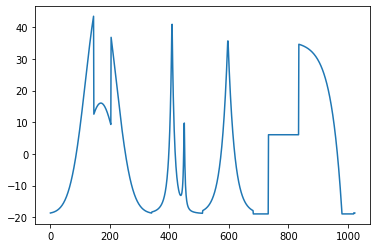

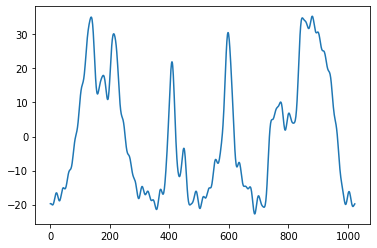

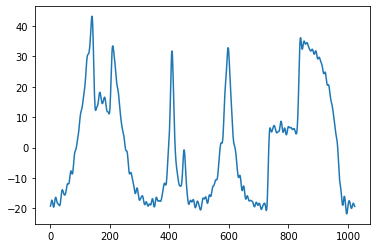

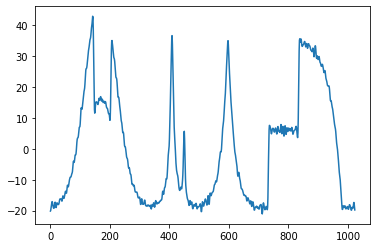

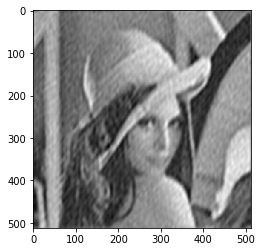

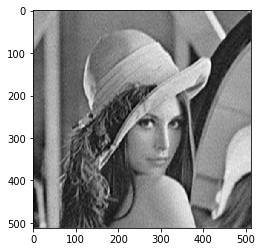

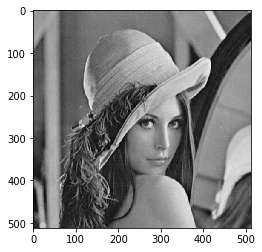

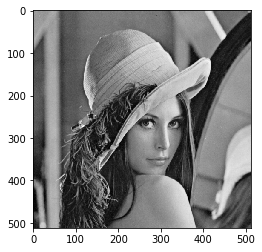

In [23]:
                    ##     ÉCRIRE VOTRE CODE ICI     ##
def meilleur1(M,s):
    S = fft(s)
    a = sorted(np.abs( S.flatten() ))
    T = a[-M]
    ST = S * ( np.abs(S) >= T )
    sT = np.real(ifft(ST))
    

    return sT
  
def meilleur2(M,s):
    S = fft2(s)
    a = sorted(np.abs( S.flatten() ))
    T = a[-M*M]
    ST = S * ( np.abs(S) >= T )
    sT = np.real(ifft2(ST))
    

    return sT

s = np.loadtxt("piece_regular.txt")
plt.plot(s)
for M in [50,100,200]:
  plt.figure()
  plt.plot(meilleur1(M,s))
  

im=imageio.imread('lena.png')
for M in [50,100,200,400]:
  plt.figure()
  plt.imshow(meilleur2(M,im))

Réponse : l'effet de Gibbs dans le premier exemple et aliasing dans le deuxieme exemple sont beaucoup réduits.


**Q4 bis :** Pour quelles valeurs de $M$ avons-nous un SNR de $30dB$ ? 

In [24]:
                   ##     ÉCRIRE VOTRE CODE ICI     ##
M=1
s = np.loadtxt("piece_regular.txt")
A=meilleur1(M,s)
a= snr(A,s)
while a<30:
  M=M+1
  A=meilleur1(M,s)
  a= snr(A,s)
print(M)

M=1
im=imageio.imread('lena.png')
A=meilleur2(M,im)
a= snr(A,im)
while a<30:
  M=M+1
  A=meilleur2(M,im)
  a= snr(A,im)
print(M)

517
213


Réponse : le premier:517
le deuxième:213

**Q4 ter :** Calculez et affichez avec l’echelle logarithmique les coefficients de Fourier de cette approximation

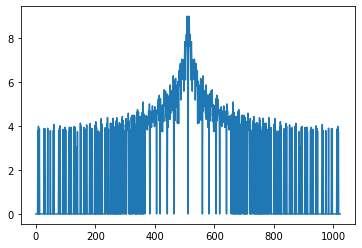

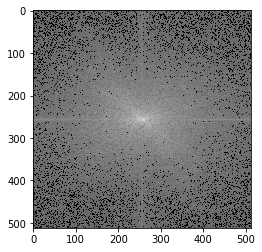

In [25]:
                    ##     ÉCRIRE VOTRE CODE ICI     ##
  M=517
  s = np.loadtxt("piece_regular.txt")
  A=meilleur1(M,s)
  modu=abs(fftshift(fft(A)))
  modu=np.log(modu+1)
  plt.plot(modu)
  
  plt.figure()
  M=483
  im=imageio.imread('lena.png')
  A=meilleur2(M,im)
  modu=abs(fftshift(fft2(A)))
  modu=np.log(modu+1)
  plt.imshow(modu)

## 2.3 Transformée en cosinus

### Question 5

 Il est souvent intéressant de faire une symétrisation d’un signal, avant de faire sa transformée de Fourier (Pourquoi ?). La transformée en cosinus discrète (DCT) est similaire à l’approximation de Fourier, à l’exception qu’elle utilise une condition de bord symétrique, au lieu des conditions périodiques. Les produits scalaires dans cette base sont calculés à l’aide du *Fast Cosine Transform algorithm*, qui nécessite $O(N\log(N))$ opérations.\
En Python les fonctions suivantes sont disponibles pour des signaux 1D :

In [0]:
D = dct(s, norm="ortho")  # D est la transformee DCT de s
d = idct(D, norm="ortho") # d est la transformee DCT inverse de D

**Q5 :** Quels avantages voyez-vous à la DCT par rapport à la TFD ?

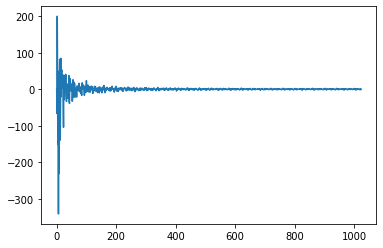

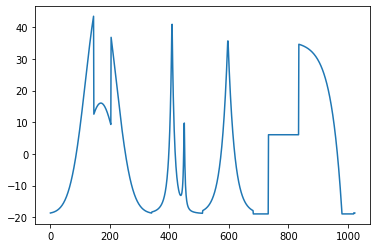

In [27]:
      ###    TESTER ICI    ###
  
  plt.plot(np.real(D))
  plt.figure()
  plt.plot(d)

**Réponse :** le temps de calcul est plus court.

**Q5 bis :** Appliquez la DCT au signal 1D `piece_regular`. Affichez le signal d’origine et le logarithme du module des coefficients DCT. 

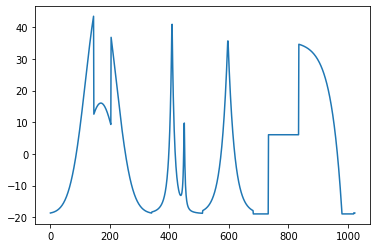

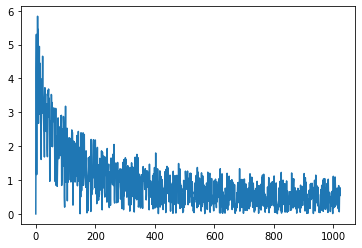

In [28]:
      ##    ÉCRIRE VOTRE CODE ICI     ##
  s = np.loadtxt("piece_regular.txt")
  plt.plot(s)
  plt.figure()
  D = dct(s, norm="ortho")

  plt.plot(np.log(np.abs(D)+1))

**Q5 ter :** Où sont les basses fréquences ? 

**Réponse :** les basses fréquences sont près de l'axe y.

### Question 6

**Q6 :** Pour le signal précédent, calculez la meilleure approximation avec $M$ termes, dans la base de cosinus. 

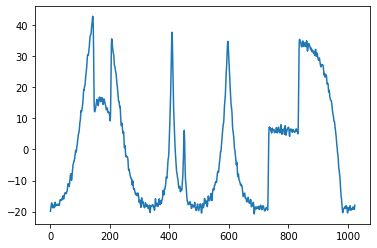

In [29]:
    ##    ÉCRIRE VOTRE CODE ICI    ##
def meilleur3(M,s):
    S = dct(s,norm="ortho")
    a = sorted(np.abs( S.flatten() ))
    T = a[-M]
    ST = S * ( np.abs(S) >= T )
    sT = idct(ST,norm="ortho")
    

    return sT

plt.figure()
A=meilleur3(200,s) # je me donne une valeur de M
plt.plot(A)


**Q6 bis :** Calculez et affichez avec l’échelle logarithmique les coefficients de Fourier de cette approximation. 

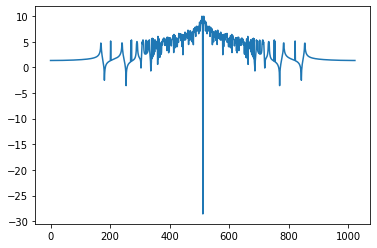

In [30]:
    ##    ÉCRIRE VOTRE CODE ICI    ##
  plt.plot(np.log(abs(fftshift(fft(A))))+1)

**Q6 ter :** Pour quelles valeurs de $M$ avons-nous un SNR de $30dB$ ? Comparez les approximations de Fourier et DCT.

In [31]:
    ##    ÉCRIRE VOTRE CODE ICI    ##
M=1
s = np.loadtxt("piece_regular.txt")
A=meilleur3(M,s)
a= snr(A,s)
while a<30:
  M=M+1
  A=meilleur3(M,s)
  a= snr(A,s)
print(M)

419


**Réponse :** 419.
en DFT c'est 517

## 2.4 Transformée en cosinus locale. Algorithme JPEG

JPEG est un format de représentation des images. L’algorithme sépare l’image en blocs $8 \times 8$ et calcule la DCT sur chacun de ces blocs. Après, les hautes fréquences, celles auxquelles l’oeil humain est très peu sensible, sont ramenées à $0$ si elles sont de faible amplitude. L’intérêt est qu’une longue suite de zéros nécessite très peu de place pour être stockée dans un fichier.

Calculez et étudiez la DCT de plusieurs images simples : une image constante, une image à moitié noire et à moitié blanche, une image avec un seul point, etc. Vous devriez savoir répondre aux questions suivantes :

 - Que représente le coefficient $(1,1)$ de la DCT d’une image ? 
 - Quel est le résultat si on applique la IDCT sur une matrice qui a tous les coefficients à $0$ sauf un coefficient à $1$ 

### Question 7

Les deux cellules suivantes définissent des fonctions `dct2` et `idct2`.

In [0]:
def dct2(u):
    return dct(dct(u, norm="ortho", axis=0), norm="ortho", axis=1)

def idct2(u):
    return idct(idct(u, norm="ortho", axis=0), norm="ortho", axis=1)

**Q7 :** En regardant le code des fonction `dct2` et `idct2`, expliquez pouquoi `dct2` utilise uniquement la fonction `dct`.

**Réponse :** Même aue la transformation Fourier discrète à dimension 2, DCT à dimension 2 est aussi  procédé  en faisant 2 fois DCT  à dimension une.

La transforme DCT en 2D fournit une base de l’espace $\mathbb{R}^{64}$, où chaque élément de cet espace s’interprète comme une imagette de taille $8 \times 8$.

![img](https://mnhrdt.github.io/afh/TP2/lbasis.jpeg)

**Q7 bis :** Faites un programme qui représente les 64 imagettes de cette base. \
Dans l'idéal, on aimerait avoir un résultat similaire à celui de l'image ci-dessus, donc par exemple y compris une marge noire de un pixel pour séparer les carrés. N'y passez pas trop de temps ! Vous pourriez par exemple faire à la place des `subplot` si vous n'y parvenez pas.

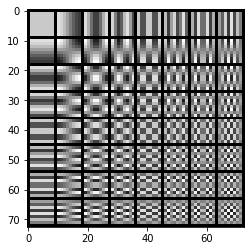

In [33]:
           ###   ÉCRIRE VOTRE CODE ICI  ###
a=np.ones((73,73))*(-0.3)
b=np.zeros((8,8))
for i in range(8):
  for j in range(8):
    b[i,j]=1
    a[1+9*i:9*(i+1),1+9*j:9*(j+1)]=idct2(b)
    b[i,j]=0
plt.imshow(a)

# 3. Du bruit dans les images

Dans cette partie, on s'intéressera à la réduction du bruit dans les images.

## 3.1 Bruit blanc Gaussien

### Question 8

Le modèle le plus simple d’image bruitée est le modèle de bruit additif. Cela consiste à considérer l’image bruitée comme la somme d'une image nette (idéale) et d’une réalisation aléatoire de moyenne nulle.
Plus précisément, nous considérons

$$ v = u + n \quad \text{avec} \quad n \sim \mathcal{N}(0, \sigma^2 id),$$
où $u$ est l’image originale, $v$ est l’image bruitée et $n$ est le bruit i.i.d. (indépendant et identiquement
distribué, c’est-à-dire que le bruit en un pixel est indépendant et a la même loi de probabilité que le bruit
en n’importe quel autre pixel), gaussien (la loi du bruit de chaque pixel est gaussienne) de variance $\sigma^2$, et non corrélé à l’image originale. Nous supposerons que la moyenne du bruit est nulle et de variance $\sigma^2$ (ce qui représente "*sa puissance*"). Ce modèle est illustré dans la figure suivante :

![img](https://mnhrdt.github.io/afh/TP2/noisy_signal.jpeg)

**Q8 :** À l’aide de la fonction `np.random.randn`, créez un signal 1D d’un bruit gaussien de moyenne nulle et de variance $\sigma^2 = 3$.

**Aide python :** `sigma * randn(n)` génère un signal de longueur $n$ avec une variance `sigma^2`. 

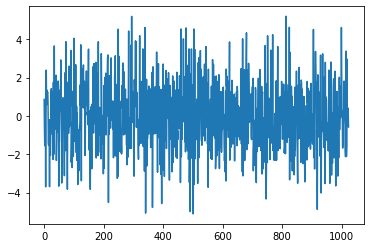

In [34]:
             ###  ÉCRIRE VOTRE CODE ICI  ###
  signal=np.sqrt(3)*np.random.randn(1024)
  plt.plot(signal)

**Q8 bis :** Quelle allure a le spectre de ce bruit ?

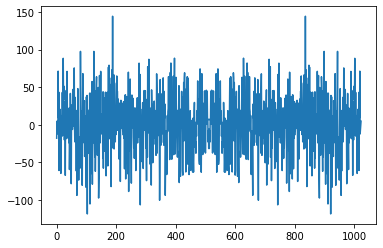

In [35]:
             ###  ÉCRIRE VOTRE CODE ICI  ###
  bruit=np.real((fftshift(fft(signal))))
  plt.plot(bruit)

**Réponse :** le spectre de bruit est aléatoirement distribué, aussi réparti que le signal.

**Q8 ter :** En vous inspirant de la figure ci-dessus, affichez dans la même figure le signal 1D original, le bruit blanc gaussien et le signal 1D bruité.

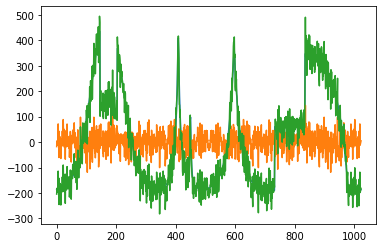

In [36]:
             ###  ÉCRIRE VOTRE CODE ICI  ###
  plt.plot(s*10)
  plt.plot(bruit)
  plt.plot(bruit+s*10)

### Question 9

Le but de cette question est de reprendre ce qui a été fait en 1D sur un signal mais de le faire maintenant sur une image. La figure qui illustre le modèle de bruit dans ce cas est :

![img](https://mnhrdt.github.io/afh/TP2/noisy_image.jpeg)

**Q9 :** Générez une image bruitée avec un bruit Gaussien avec $\sigma = 15$ et affichez dans une
figure l’image originale, le bruit et l’image bruitée.

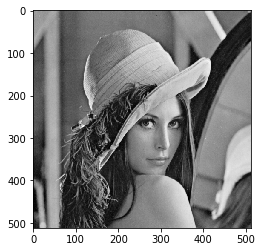

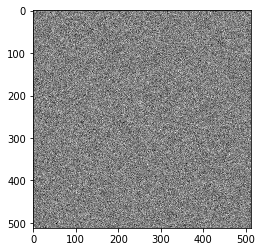

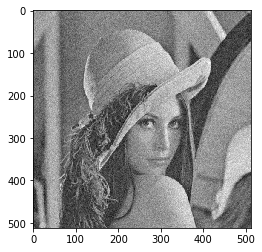

In [37]:
             ###  ÉCRIRE VOTRE CODE ICI  ###
  u = imageio.imread("lena.png")
  bruit= 15*np.random.randn(u.shape[0],u.shape[1])
  
  plt.imshow(u)
  plt.figure()
  plt.imshow(bruit)
  plt.figure()
  plt.imshow(u+bruit)

**Q9 bis :** Commentez les résultats.

**Réponse :** Les bruits sont aléatoirement répartis.

## 3.2 Débruitage des images avec des méthodes linéaires

### Question 10

Un opérateur linéaire et invariant par translation est nécessairement une convolution avec un noyau. Il correspond à une opération diagonale dans le domaine de Fourier, qui multiplie chaque coefficient de Fourier du signal/image bruité avec le coefficient de Fourier de la transformée du filtre. Nous utilisons un lissage simple pour supprimer les fréquences élevées causées par le bruit :

$$ u = u_b \star h, $$

et on cherche à trouver une estimation du signal net $u$ à partir de $u_b$ (signal bruité).

**Q10 :** Écrivez l’équation ci-dessus dans le domaine fréquentiel.

**Réponse :** $U_n = U_{bn}H_n$

Dans la pratique, $h$ est un filtre Gaussien de moyenne 0 et d’écart-type $s$. Notez que la DFT $\hat{h}$ est aussi gaussienne.

**Q10 bis :**  Quelle est sa variance ? 

**Réponse :** $s^2$

### Question 11

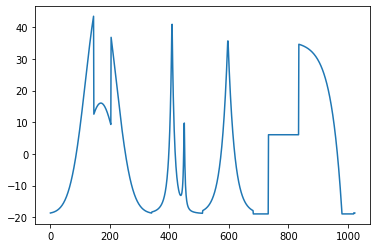

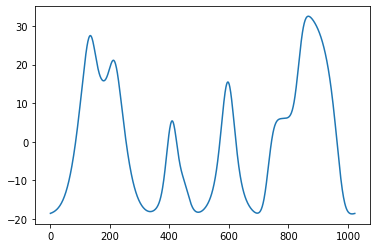

In [38]:
def gaussian1d(n,std):
    return [1 / (std * np.sqrt(2*np.pi)) * np.exp(-float(x - n//2)**2/(2*std**2)) for x in range(n)]


s = np.loadtxt("piece_regular.txt")
N, = s.shape

std = 15
g = gaussian1d(N,std)
gg = fftshift(g)
smooth = np.real( ifft( fft(gg) * fft(s) ) )

plt.figure()
plt.clf()
plt.plot(s)

plt.figure()
plt.clf()
plt.plot(smooth)

**Q11 :** Essayez et décrivez le code ci-dessus.

**Réponse : Après la convolution avec une gaussienne, les hautes fréquences sont réduites.

**Q11 bis :** Adaptez le code précédent pour appliquer la convolution pour débruiter les images (bruitées) obtenues dans la question 9. 

In [0]:
def gaussian2d(n,m,std):
    a=np.zeros((n,m))
    for x in range(n):
      a[x,:]=[(1 / (std * np.sqrt(2*np.pi)))**2 * np.exp(-float(x - n//2)**2/(2*std**2)) * np.exp(-float(y - m//2)**2/(2*std**2)) for y in range(m)]
    return a


**Q11 ter :** Affichez le signal original, le signal bruité et le signal débruité par
convolution.

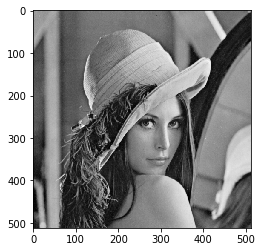

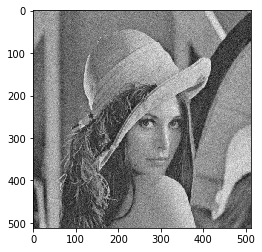

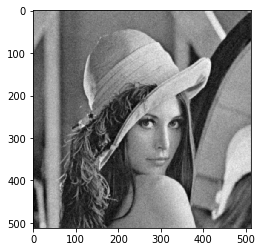

In [40]:
u = imageio.imread("lena.png")
bruit= 15*np.random.randn(u.shape[0],u.shape[1])

imageb=u+bruit

N,M = u.shape

std = 1
g = gaussian2d(N,M,std)

gg = fftshift(g)
smooth = np.real( ifft2( fft2(gg) * fft2(imageb) ) )

plt.figure()
plt.clf()
plt.imshow(u)

plt.figure()
plt.clf()
plt.imshow(imageb)

plt.figure()
plt.clf()
plt.imshow(smooth)


**Q11 quater :** Comparez les coefficients de Fourier des signaux bruité et débruité, à l’échelle logarithmique. Commentez les résultats.

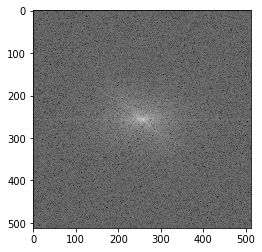

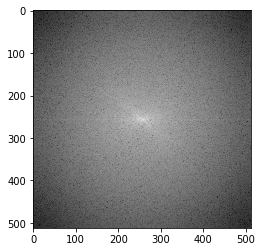

In [41]:
plt.figure()
plt.clf()
plt.imshow(np.log(abs(fftshift(fft2(imageb))))+1)
plt.figure()
plt.clf()
plt.imshow(np.log(abs(fftshift(fft2(smooth))))+1)

**Réponse :** Les coefficients de Fourier de l'image bruitée sont aléatoirement répartis, et ceux de l'image débruitée sont beaucoup plus réduits sur les hautes fréquences.

**Q11 quinqies :**  Quelle valeur de `std` donne le résultat avec le meilleur SNR ? (La fonction `gaussian2d(m,n,std)` peut être utile.)

25.529958653989723 0.8448275862068966


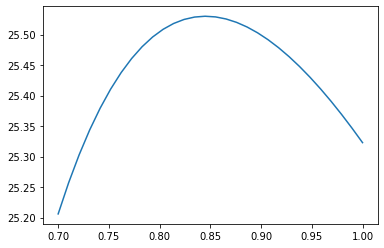

In [46]:
n,m=u.shape


def convol(std):
  g = gaussian2d(n,m,std)
  gg = fftshift(g)
  return np.real( ifft2( fft2(gg) * fft2(u+bruit) ) )


X=np.linspace(0.7,1,30)
Y=[snr(convol(std),u) for std in X]
plt.plot(X,Y)
m=max(Y)
print(m,X[Y.index(m)])

**Réponse :  STD=0.84
La meilleur snr: 25.2

### Question 12

**Q12 :** Comment utiliseriez-vous l’approximation linéaire / non-linéaire (2.1 et 2.2) de Fourier
pour faire du débruitage ?

**Réponse :** L'approximation linéaire peut annuler les hautes fréquences; l'approximation non linéaire annule les fréquences d'amplitude faible.

**Q12 bis :** Affichez les résultats et les valeurs de SNR.

In [43]:
signal=np.sqrt(3)*np.random.randn(1024)
n,m=u.shape

L=[snr(np.real(ifft(ifftshift(approx1(M,s+signal)))),s) for M in range(len(s))]
print("signal 1d: snr max avec la méthode linéaire: "+str(max(L)))

L=[snr(meilleur1(M,s+signal),s) for M in range(len(s))]
print("signal 1d: snr max avec la méthode non linéaire: "+str(max(L)))

L=[snr(approx2(u+bruit,M**2)[0],u) for M in range(n)]
print("image 2d: snr max avec la méthode linéaire: "+str(max(L)))

L=[snr(meilleur2(M,u+bruit),u) for M in range(n)]
print("image 2d: snr max avec la méthode non linéaire: "+str(max(L)))

signal 1d: snr max avec la méthode linéaire: 21.997575925602067
signal 1d: snr max avec la méthode non linéaire: 20.935977835511885
image 2d: snr max avec la méthode linéaire: 24.289504784888347
image 2d: snr max avec la méthode non linéaire: 23.090596793711615
